**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import h5py
Dataset1 = h5py.File(r"Lab1_Ex_1_Synthtetic.hdf5")
Data = np.array(Dataset1.get('Dataset'))   
Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

**Data set**

In [3]:
Train_Set.shape

(200, 3)

**Defining euclidian distance**

In [4]:
def euclidian_distance(pt1,pt2):
    distance = np.sqrt(np.sum((pt1-pt2)**2))
    return distance

**Implementation of $k-nn$**

In [5]:
def k_nn(X_train, X_sample, k_val):
    y_hat = []
    #y_hat is the vector of predicted labels
    for test_pt in X_sample[:,range(0,len(X_sample[0,:])-1)]:
        # For each vector in X_sample, compute the distances with 
        # all vectors in X_train
        distances = []
        for train_pt in X_train[:,range(0,len(X_train[0,:])-1)]:
            distances.append(euclidian_distance(train_pt, test_pt))               
        k_nn = np.argsort(distances)[0:k_val]
        # List of indices of the nearest k_val points 
        # and corresponding labels
        labels =X_train[k_nn,len(X_train[0,:])-1]
        classes, counts = np.unique(labels, return_counts=True)
        index = np.argmax(counts)
        # Find the most frequent class 
        y_hat.append(classes[index])        
    return y_hat

In [7]:
Train_Set[:,range(0,len(Train_Set[0,:])-1)];
#The loop is on the 2D vectors

### **Results for $k=1$, $k=200$**

In [6]:
y_hat = k_nn(Train_Set,Train_Set, k_val=1)

In [8]:
y_hat == Train_Set[:,2];
# For k=1 ,it gives back the classes of the training set itself

In [10]:
y_hat = k_nn(Train_Set,Train_Set, k_val=200)
y_hat;
# For k = 200, it gives back always the majority of the training set, which is 1.

In [9]:
# For the training set, the majority is one
classes, counts =np.unique(Train_Set[:,2], return_counts=True)
index = np.argmax(counts)
classes[index],classes,counts

(1.0, array([0., 1.]), array([ 97, 103], dtype=int64))

**Simple function to compute accuracy**

In [10]:
def accuracy(y,y_guessed):
    N=len(y)
    err=0
    for i in range(0,N-1):
        if y[i] != y_guessed[i]:
            err += 1/N        
    return 1 - err

In [11]:
# Choosing k = 1, we find 100% of accuracy on the training set
accuracy(Train_Set[:,2],k_nn(Train_Set,Train_Set, k_val=1))

1

In [14]:
# Accuracy on the test set, choosing k = 1.
accuracy(Test_Set[:,2],k_nn(Train_Set,Test_Set, k_val=1))

0.9450000000000001

In [15]:
# Accuracy on the train set, choosing k = 200.
accuracy(Train_Set[:,2],k_nn(Train_Set,Train_Set, k_val=200))

0.5199999999999997

In [16]:
# Accuracy on the test set, choosing k = 200.
accuracy(Test_Set[:,2],k_nn(Train_Set,Test_Set, k_val=200))

0.48499999999999965

### **Accuracy for different values of $k$ for the Training and Test Set**

In [12]:
k_range=[1,2,5,6,7,8,10,20,30,50,80,100,130,160,180,200]

In [18]:
# Accuracy on Test Set
acc_test= []
for i in k_range:
    acc_test.append(accuracy(Test_Set[:,2],k_nn(Train_Set,Test_Set, i)))

In [19]:
# Accuracy on Train set
acc_train = []
for i in k_range:
    acc_train.append(accuracy(Train_Set[:,2],k_nn(Train_Set,Train_Set, i)))

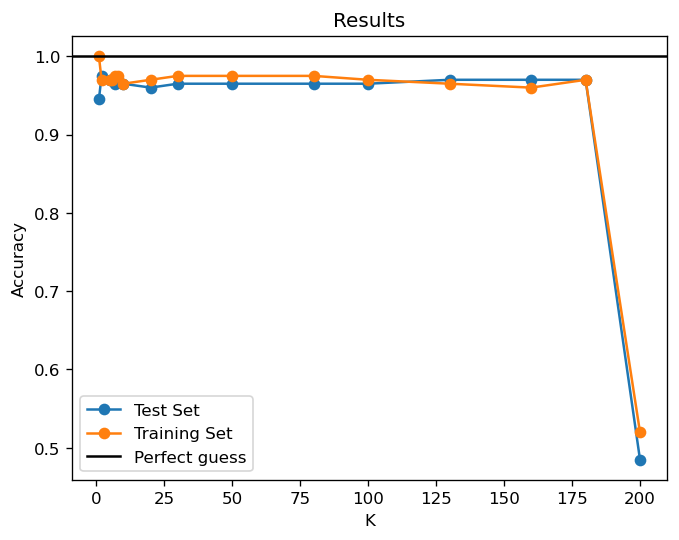

In [20]:
plt.figure(num=0,dpi=120)
plt.plot(k_range,acc_test,"-o", label="Test Set",)
plt.plot(k_range,acc_train,"-o", label="Training Set")
plt.axhline(y=1, color='k', linestyle='-', label= "Perfect guess")
plt.title("Results")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### 

**Comments to exercise 1**

In the plot above the results of the **k-nn** method are shown when applied both on the training set and the test set.
The accuracy is defined as:

\begin{align}
1 - err(f,D) = 1 - \frac{1}{N} \sum_{i=1}^N \mathbb{1}(f(x_{i} \neq y_{i}) 
\end{align}
where  $err(f,D)$ is the misclassification rate, computed both on the training set and the test set.
The **k-nn** method acts by classifying the data associating the most probable class label, i.e. the label of the majority of the $k$ nearest neighbours.
We can see from the plot that for $k = 1$ there's an overfitting of the data: the accuracy on the training set is $1$ while on the test set we obtain a smaller value ($0.95$).

For $k=1$ , the method, when applied on the training set, will return the original labels since the 1st neighbour of a training point will be that point itself. The method is "too much" fitted on the input, so it will perform badly on the prediction of class labels for new data.

While for $k = 200$ (= number of training points), the method, when applied to the training test, will return constantly $1$, which represents the most frequent class label on the whole set used to train the classifier, we are in the case of underfitting: in this way the method loses information on the locality of test points, that is needed to give a reasonable prediction on the class of new data. 

An intermediate **k** will guarantee both the right amount of averaging between **nn's** and the right "scale" of locality: we can see from the plot that the optimal performance on the test set is roughly reached for a **k** value approximately in a range from $5$ to $10$.



**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

In [13]:
from statistics import mode

In [14]:
#Part 1

Dataset2 = h5py.File(r"Lab1_Ex_2_wine.hdf5")

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

In [24]:
# Form of the training data
Train_Set[0,:]

array([0.46478873, 0.27272727, 0.15060241, 0.12158055, 0.10404624,
       0.07266436, 0.28181818, 0.9563418 , 0.80104712, 0.35185185,
       0.76056338, 6.        ])

In [15]:
k_range=[1,2,5,6,7,8,10,20,30,50,80,100,130,160,180,200]

### **Prediction accuracy for different values of $k$**

In [26]:
# Accuracy on Test Set
acc_test= []
for i in k_range:
    acc_test.append(accuracy(Test_Set[:,len(Test_Set[0,:]) - 1],k_nn(Train_Set,Test_Set, i)))

In [25]:
# Accuracy on Train set
acc_train = []
for i in k_range:
    acc_train.append(accuracy(Train_Set[:,len(Train_Set[0,:]) - 1],k_nn(Train_Set,Train_Set, i)))

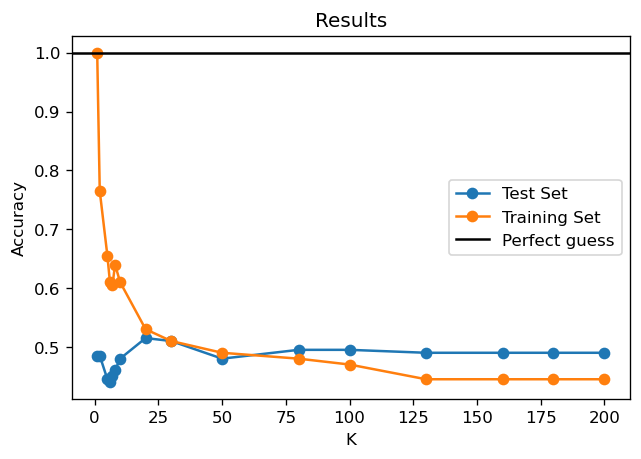

In [26]:
plt.figure(num=0,dpi=120)
plt.plot(k_range,acc_test,"-o", label="Test Set",)
plt.plot(k_range,acc_train,"-o", label="Training Set")
plt.axhline(y=1, color='k', linestyle='-', label= "Perfect guess")
plt.title("Results")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
#Part 2
from sklearn import linear_model
X = Train_Set[:,range(0,len(Train_Set[0,:])-1)]
Y =  Train_Set[:,len(Train_Set[0,:]) - 1]
clf = linear_model.LinearRegression().fit(X,Y)

**Predictions on test set**

In [22]:
Y_predict = clf.predict(Test_Set[:,range(0,len(Test_Set[0,:])-1)])

In [29]:
#Mean Squared Error 
def MSE(Y_true,Y_predict):
    N=len(Y_true)
    mse = 0.0
    for i in range(0,N-1):
        mse += (1/N)*((Y_true[i] - Y_predict[i])**2)
    return mse

**Comparison in terms of MSE**

**MSE on test set, with predictions obtained through linear regression**

In [30]:
MSE(Y_predict,Test_Set[:,len(Test_Set[0,:])-1])

0.599651847636214

**MSE on test set, with predictions obtained through $k-nn$ method, using as $k$ the optimal value (i.e. the one that gives the best accuracy)**

In [31]:
#Find k optimal from the ones I chose
index =np.argmax(acc_test)
k_opt =k_range[index]

In [32]:
MSE(k_nn(Train_Set,Test_Set, k_val=k_opt),Test_Set[:,len(Test_Set[0,:])-1])

0.6950000000000005

**The two methods use different metrics** ( Accuracy for k-nn, MSE for Linear Regression)

In [49]:
def accuracy_rounded(y,y_guessed):
    N=len(y)
    err=0
    for i in range(0,N-1):
        if round(y[i]) != round(y_guessed[i]):
            err += 1/N
        
    return 1 - err

In [23]:
Y_predict;
# Lin regression predicts a real label, not an integer.

**Comparison in terms of accuracy**

In [61]:
#k-nn
accuracy(k_nn(Train_Set,Test_Set, k_val=k_opt),Test_Set[:,len(Test_Set[0,:])-1])

0.5149999999999997

In [62]:
# Lin Regression
accuracy_rounded(Y_predict,Test_Set[:,len(Test_Set[0,:])-1])

0.47499999999999964

**Student's comments to exercise 2**



The **k-nn** method performs slightly worse on this dataset with respect to what was obtained in exercise 1. One reason could be related to the curse of dimensionality, this data is in an higher dimensional space which causes the available data to become more sparse and the concept of locality to deteriorate. We can identify from the plot of Results above overfitting and underfitting. 


For the second part of the exercise, a comparison between the linear regression and the k-nn is shown: the two methods use different metrics for classification.


Linear regression predicts a real label, k-nn predicts an integer one, to compare them one must be consistent, either by using the MSE for both or the accuracy. In the latter case, it is better to round the result of the L.R. to the nearest integer. 



In [63]:
[mode(Test_Set[:,len(Test_Set[0,:]) -1]),mode(Train_Set[:,len(Train_Set[0,:]) -1])]
# Both for Training and Test the the most frequent label is 6, for k =200 we will find, for this specific case, that the 
# method "works better for the test set"

[6.0, 6.0]

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

In [27]:
Dataset3 = h5py.File(r"Lab1_Ex_3.hdf5")
Data = np.array(Dataset3.get('Dataset'))
Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

In [74]:
k_range=[1,2,5,6,7,8,10,20,30,40,50,55,60,65,70,80,100,110,130,160,180,200]

In [75]:
# Accuracy on Test Set
acc_test= []
for i in k_range:
    acc_test.append(accuracy(Test_Set[:,len(Test_Set[0,:]) - 1],k_nn(Train_Set,Test_Set, i)))

In [76]:
# Accuracy on Train set
acc_train = []
for i in k_range:
    acc_train.append(accuracy(Train_Set[:,len(Train_Set[0,:]) - 1],k_nn(Train_Set,Train_Set, i)))

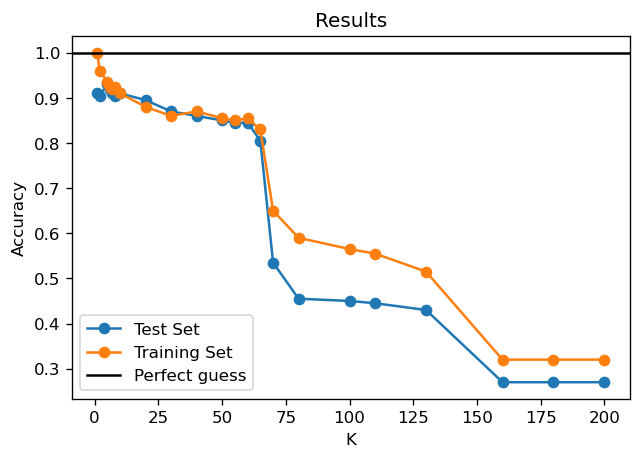

In [77]:
plt.figure(num=0,dpi=120)
plt.plot(k_range,acc_test,"-o", label="Test Set",)
plt.plot(k_range,acc_train,"-o", label="Training Set")
plt.axhline(y=1, color='k', linestyle='-', label= "Perfect guess")
plt.title("Results")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Student's comments to exercise 3**


We can notice that, even if this dataset has an even higher dimensionality, **k-nn** works generally well for $k$ sufficiently small.
It is true that the high dimensionality worsens the result, but we are always dealing with a specific sample of data, the result then will depend on sample-dependent properties and fluctuations.